In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Define file paths
feedback_file_path = "/content/drive/MyDrive/Customer_Feedback_Data.csv"
product_file_path = "/content/drive/MyDrive/Product_Offering_Data.csv"
transaction_file_path = "/content/drive/MyDrive/Transaction_Data.csv"

In [8]:
# Load datasets
customer_feedback_data = pd.read_csv(feedback_file_path)
product_offering_data = pd.read_csv(product_file_path)
transaction_data = pd.read_csv(transaction_file_path)

In [9]:
# Display basic structure of each dataset
print("Customer Feedback Data Overview:")
print(customer_feedback_data.info(), "\n")

print("Product Offering Data Overview:")
print(product_offering_data.info(), "\n")

print("Transaction Data Overview:")
print(transaction_data.info(), "\n")

Customer Feedback Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB
None 

Product Offering Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-

In [10]:
# Customer Feedback Preprocessing
customer_feedback_data.columns = ["Customer ID", "Satisfaction Score", "Feedback Comments", "Likelihood To Recommend"]

In [11]:
print("Updated Customer Feedback Data Columns:")
print(customer_feedback_data.columns)

Updated Customer Feedback Data Columns:
Index(['Customer ID', 'Satisfaction Score', 'Feedback Comments',
       'Likelihood To Recommend'],
      dtype='object')


In [12]:
# Check missing values for Customer Feedback
print("Missing Values in Customer Feedback Data:")
print(customer_feedback_data.isnull().sum(), "\n")

Missing Values in Customer Feedback Data:
Customer ID                  0
Satisfaction Score         101
Feedback Comments            0
Likelihood To Recommend      0
dtype: int64 



In [13]:
# Fill missing satisfaction scores with the median
customer_feedback_data["Satisfaction Score"] = customer_feedback_data["Satisfaction Score"].fillna(
    customer_feedback_data["Satisfaction Score"].median()
)

In [14]:
# Fill missing feedback comments with a placeholder
customer_feedback_data["Feedback Comments"] = customer_feedback_data["Feedback Comments"].fillna("No Comments")

# Verify that missing values are handled
print("Missing Values in Customer Feedback Data after Handling:")
print(customer_feedback_data.isnull().sum())

Missing Values in Customer Feedback Data after Handling:
Customer ID                0
Satisfaction Score         0
Feedback Comments          0
Likelihood To Recommend    0
dtype: int64


In [15]:
# Check for duplicate rows
duplicate_rows = customer_feedback_data[customer_feedback_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display sample duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())
else:
    print("No duplicate rows found.")

Number of duplicate rows: 83
Sample duplicate rows:
      Customer ID  Satisfaction Score Feedback Comments  \
1127          972                 3.0      Good service   
1541          380                 2.0    Unsatisfactory   
1619          309                 6.0    Unsatisfactory   
1796          726                 3.0    Very satisfied   
1950          890                 3.0    Unsatisfactory   

      Likelihood To Recommend  
1127                        1  
1541                        9  
1619                        1  
1796                        7  
1950                        5  


In [16]:
duplicate_details = customer_feedback_data[customer_feedback_data.duplicated(subset=['Customer ID'], keep=False)]
print("Details of duplicate rows grouped by Customer ID:")
print(duplicate_details.groupby('Customer ID').agg(list))

Details of duplicate rows grouped by Customer ID:
                                            Satisfaction Score  \
Customer ID                                                      
1                                                  [10.0, 7.0]   
2                                              [3.0, 7.0, 3.0]   
3                                             [10.0, 9.0, 6.0]   
4                               [7.0, 7.0, 7.0, 2.0, 4.0, 6.0]   
5                [8.0, 7.0, 8.0, 7.0, 7.0, 7.0, 3.0, 3.0, 8.0]   
...                                                        ...   
996                                                [8.0, 10.0]   
997                                 [2.0, 8.0, 3.0, 5.0, 10.0]   
998          [7.0, 1.0, 7.0, 8.0, 8.0, 7.0, 4.0, 3.0, 4.0, ...   
999                                 [10.0, 6.0, 8.0, 6.0, 4.0]   
1000                                      [5.0, 6.0, 2.0, 4.0]   

                                             Feedback Comments  \
Customer ID              

In [17]:
# Aggregate duplicate feedback data by Customer ID
aggregated_feedback = customer_feedback_data.groupby('Customer ID').agg({
    'Satisfaction Score': 'mean',  # Average satisfaction score
    'Feedback Comments': lambda x: '; '.join(set(x)),  # Combine unique feedback comments
    'Likelihood To Recommend': 'mean'  # Average likelihood to recommend
}).reset_index()

# Display aggregated data
print("Aggregated Customer Feedback Data:")
print(aggregated_feedback.head())

Aggregated Customer Feedback Data:
   Customer ID  Satisfaction Score  \
0            1            8.500000   
1            2            4.333333   
2            3            8.333333   
3            4            5.500000   
4            5            6.444444   

                                   Feedback Comments  Likelihood To Recommend  
0                       Very satisfied; Good service                 9.000000  
1                     Very satisfied; Unsatisfactory                 5.000000  
2          Very satisfied; Unsatisfactory; Excellent                 3.666667  
3       Unsatisfactory; Excellent; Needs improvement                 3.333333  
4  Good service; Very satisfied; Excellent; Unsat...                 5.666667  


In [18]:
# Save aggregated customer feedback data
aggregated_feedback.to_csv("Aggregated_Customer_Feedback.csv", index=False)
print("Aggregated Customer Feedback Data saved successfully.")

Aggregated Customer Feedback Data saved successfully.


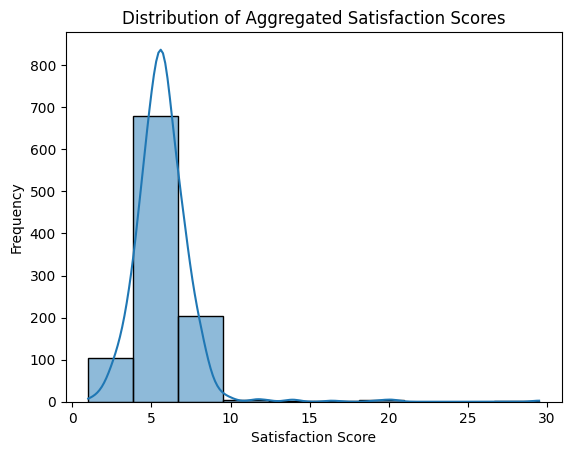

In [19]:
# Plot distribution of aggregated satisfaction scores
sns.histplot(aggregated_feedback['Satisfaction Score'], kde=True, bins=10)
plt.title("Distribution of Aggregated Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

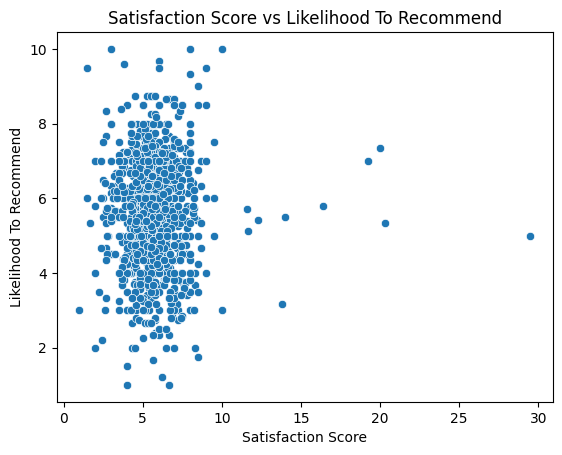

In [20]:
# Scatter plot for Satisfaction Score vs Likelihood To Recommend
sns.scatterplot(x='Satisfaction Score', y='Likelihood To Recommend', data=aggregated_feedback)
plt.title("Satisfaction Score vs Likelihood To Recommend")
plt.xlabel("Satisfaction Score")
plt.ylabel("Likelihood To Recommend")
plt.show()

In [21]:
# Check missing values for Product Offering Data
print("Missing Values in Product Offering Data:")
print(product_offering_data.isnull().sum(), "\n")

Missing Values in Product Offering Data:
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64 



In [22]:
# Product Offering Preprocessing
# Update column names to match the desired format
product_offering_data.columns = ["Product ID", "Product Name", "Product Type", "Risk Level", "Target Age Group", "Target Income Group"]

# Verify updated column names
print("Updated Product Offering Data Columns:")
print(product_offering_data.columns)

Updated Product Offering Data Columns:
Index(['Product ID', 'Product Name', 'Product Type', 'Risk Level',
       'Target Age Group', 'Target Income Group'],
      dtype='object')


In [23]:
# Verify that Product ID maps uniquely to Product Name
unique_mapping = product_offering_data.groupby('Product ID')['Product Name'].nunique()
if unique_mapping.max() > 1:
    print("Inconsistent mapping found between Product ID and Product Name.")
else:
    print("Product ID uniquely maps to Product Name.")

Product ID uniquely maps to Product Name.


In [24]:
# Validate completeness
print("Missing values in Product Name:", product_offering_data['Product Name'].isnull().sum())

Missing values in Product Name: 0


In [25]:
# Analyze missing values
missing_age_group = product_offering_data['Target Age Group'].isnull().sum()
total_rows = product_offering_data.shape[0]
print(f"Missing Target Age Group: {missing_age_group}")
print(f"Percentage missing: {missing_age_group / total_rows * 100:.2f}%")

Missing Target Age Group: 15
Percentage missing: 100.00%


Missing Target Age Group after filling: 0


<ipython-input-26-0344ac44be27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_offering_data['Target Age Group'].fillna('Unknown', inplace=True)
<ipython-input-26-0344ac44be27>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_offering_data['Target Age Group'].fillna('Unknown', inplace=True)
<ipython-input-26-0344ac44be27>:8: Futu

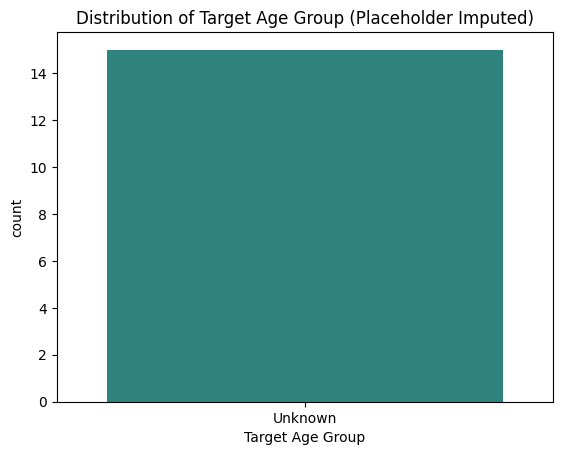

In [26]:
# Fill all missing values in Target Age Group with 'Unknown'
product_offering_data['Target Age Group'].fillna('Unknown', inplace=True)

# Verify no missing values remain
print("Missing Target Age Group after filling:", product_offering_data['Target Age Group'].isnull().sum())

# Check the distribution of the Target Age Group column
sns.countplot(x='Target Age Group', data=product_offering_data, palette='viridis')
plt.title('Distribution of Target Age Group (Placeholder Imputed)')
plt.show()

In [27]:
# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(product_offering_data.describe(), "\n")

# Display unique values in categorical columns
categorical_cols = product_offering_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(product_offering_data[col].unique(), "\n")

Summary Statistics for Numerical Columns:
       Product ID
count   15.000000
mean     5.133333
std      3.159265
min      1.000000
25%      2.500000
50%      5.000000
75%      7.500000
max     10.000000 

Unique values in Product Name:
['Platinum Credit Card' 'Gold Savings Account'
 'High-Yield Investment Account' 'Mortgage Loan' 'Auto Loan'
 'Personal Loan' 'Youth Savings Account' 'Retirement Investment Fund'
 'Business Loan' 'Travel Credit Card'] 

Unique values in Product Type:
['Credit Card' 'Savings Account' 'Investment' 'Loan'] 

Unique values in Risk Level:
['Medium' 'Low' 'High'] 

Unique values in Target Age Group:
['Unknown'] 

Unique values in Target Income Group:
['Medium' 'Low' 'High'] 



<ipython-input-28-78e5faac4019>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product Type", data=product_offering_data, palette="viridis")


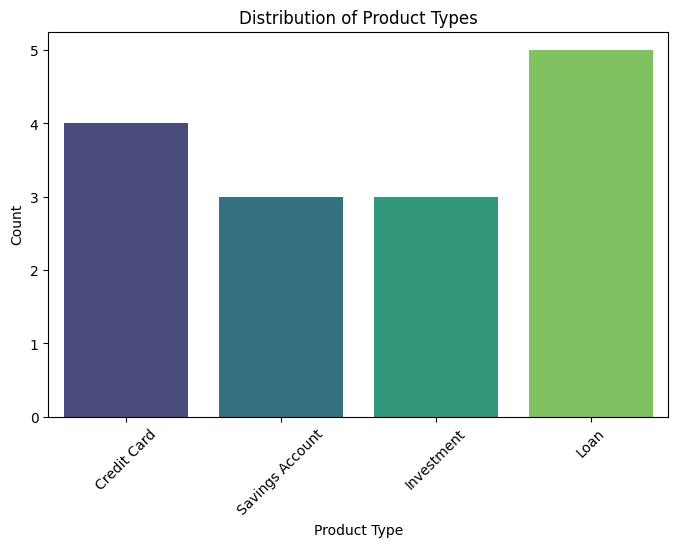

In [28]:
# Product Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Product Type", data=product_offering_data, palette="viridis")
plt.title("Distribution of Product Types")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-4b5e14002f06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Risk Level", data=product_offering_data, palette="viridis")


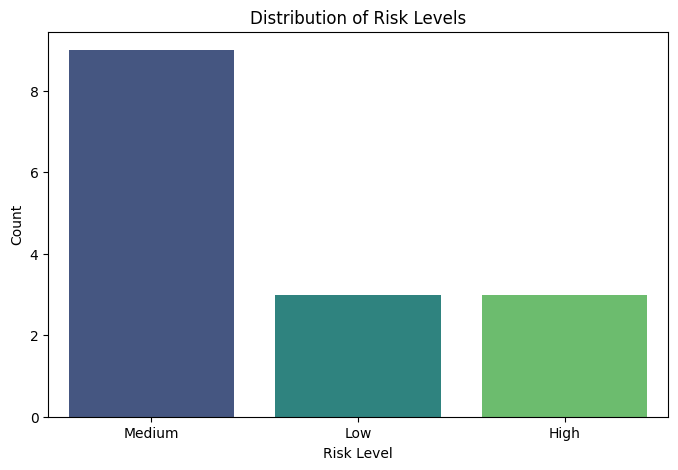

In [29]:
# Risk Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Risk Level", data=product_offering_data, palette="viridis")
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

<ipython-input-30-4257ac908f14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target Income Group", data=product_offering_data, palette="viridis")


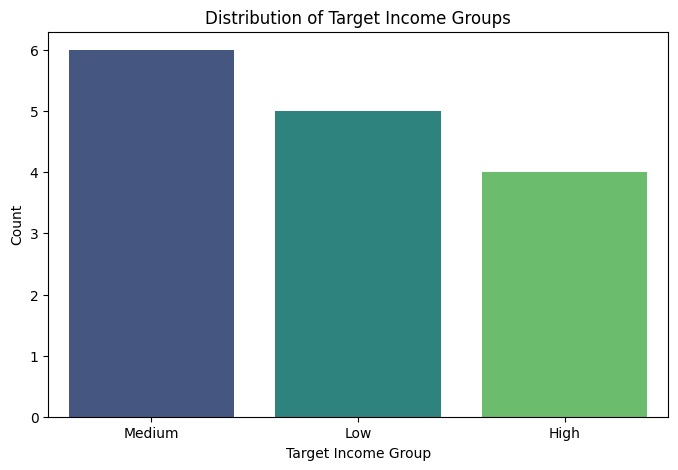

In [30]:
# Target Income Group Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Target Income Group", data=product_offering_data, palette="viridis")
plt.title("Distribution of Target Income Groups")
plt.xlabel("Target Income Group")
plt.ylabel("Count")
plt.show()

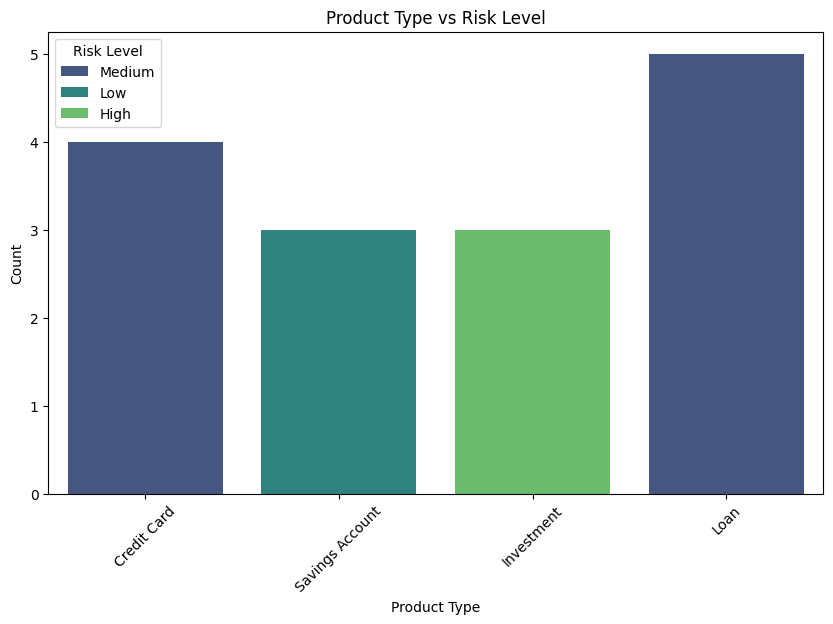

In [31]:
# Analyze Relationship
# Product Type vs Risk Level
plt.figure(figsize=(10, 6))
sns.countplot(x="Product Type", hue="Risk Level", data=product_offering_data, palette="viridis")
plt.title("Product Type vs Risk Level")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Risk Level")
plt.show()

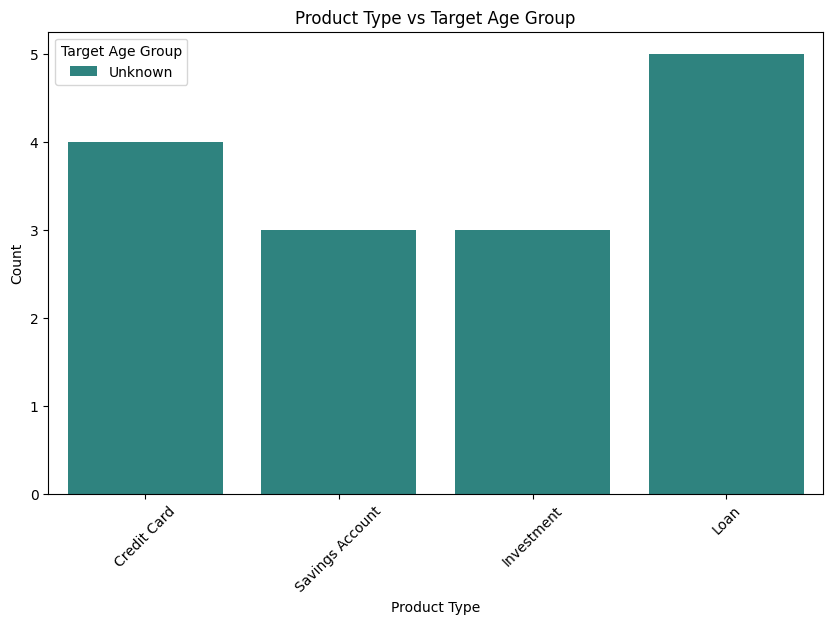

In [32]:
# Product Type vs Target Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x="Product Type", hue="Target Age Group", data=product_offering_data, palette="viridis")
plt.title("Product Type vs Target Age Group")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target Age Group")
plt.show()

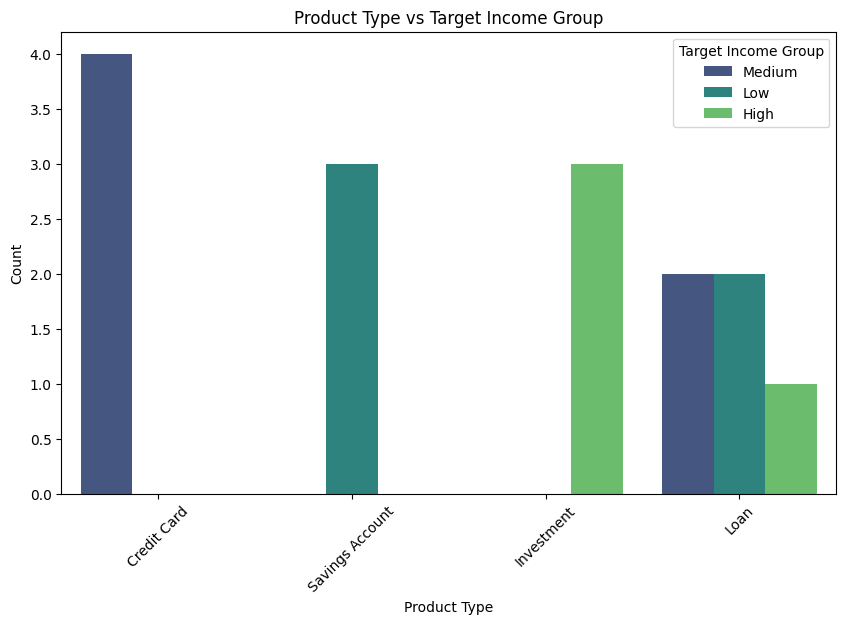

In [33]:
# Product Type vs Target Income Group
plt.figure(figsize=(10, 6))
sns.countplot(x="Product Type", hue="Target Income Group", data=product_offering_data, palette="viridis")
plt.title("Product Type vs Target Income Group")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target Income Group")
plt.show()

In [34]:
# Preprocessing for Transaction Data
# Column Name Check
transaction_data.columns = [
    "Transaction ID",
    "Customer ID",
    "Transaction Date",
    "Transaction Amount",
    "Transaction Type"
]

# Verify updated column names
print("Updated Transaction Data Columns:")
print(transaction_data.columns)

Updated Transaction Data Columns:
Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Transaction Type'],
      dtype='object')


In [35]:
# Check missing values for Transaction Data
print("Missing Values in Transaction Data:")
print(transaction_data.isnull().sum(), "\n")

Missing Values in Transaction Data:
Transaction ID          0
Customer ID             0
Transaction Date        0
Transaction Amount    100
Transaction Type        0
dtype: int64 



In [36]:
# Create a flag column for missing values in Transaction Amount
transaction_data['Transaction Amount Missing'] = transaction_data['Transaction Amount'].isnull()

# Impute missing Transaction Amount using the median grouped by Transaction Type
transaction_data['Transaction Amount'] = transaction_data.groupby('Transaction Type')['Transaction Amount'].transform(
    lambda x: x.fillna(x.median())
)

# Verify no missing values remain
print("Missing Values in Transaction Data after Imputation:")
print(transaction_data.isnull().sum())

# Inspect the updated dataset
print(transaction_data.head())

Missing Values in Transaction Data after Imputation:
Transaction ID                0
Customer ID                   0
Transaction Date              0
Transaction Amount            0
Transaction Type              0
Transaction Amount Missing    0
dtype: int64
   Transaction ID  Customer ID     Transaction Date  Transaction Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00              2485.0   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction Type  Transaction Amount Missing  
0         Purchase                       False  
1     Bill Payment                        True  
2         Purchase                       False  
3       Investment                       False  
4       Investment                       False

In [37]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(transaction_data.describe())

Summary Statistics:
       Transaction ID  Customer ID  Transaction Amount
count     5050.000000  5050.000000         5050.000000
mean      2498.927129   504.692871         3082.684950
std       1443.059092   291.593793        14671.265438
min          1.000000     1.000000           10.000000
25%       1250.250000   251.250000         1257.000000
50%       2500.500000   509.000000         2485.000000
75%       3745.750000   764.000000         3680.750000
max       5000.000000  1000.000000       480300.000000


In [38]:
# Display unique formats in Transaction Date
print("Unique formats in Transaction Date before conversion:\n", transaction_data['Transaction Date'].unique())

Unique formats in Transaction Date before conversion:
 ['2023-01-01 00:00:00' '2023-01-01 01:00:00' '2023-01-01 02:00:00' ...
 '2023-07-28 05:00:00' '2023-07-28 06:00:00' '2023-07-28 07:00:00']


In [39]:
# Check if all transaction dates follow the same format
from datetime import datetime

# Define a function to check the format of each date
def check_date_format(date_str):
    try:
        # Attempt to parse in a specific format (e.g., ISO 8601)
        datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

# Apply the function to check the format of each date
format_check = transaction_data['Transaction Date'].apply(check_date_format)

# Print results
if format_check.all():
    print("All Transaction Date values are in the same format: '%Y-%m-%d %H:%M:%S'")
else:
    print("Some Transaction Date values are not in the expected format.")
    print("Problematic values:\n", transaction_data.loc[~format_check, 'Transaction Date'])

All Transaction Date values are in the same format: '%Y-%m-%d %H:%M:%S'


In [40]:
# Convert Transaction Date to datetime
transaction_data['Transaction Date'] = pd.to_datetime(transaction_data['Transaction Date'], errors='coerce')

# Verify the conversion
print("Transaction Date Data Type After Conversion:", transaction_data['Transaction Date'].dtypes)

Transaction Date Data Type After Conversion: datetime64[ns]


In [41]:
# Check for NaT values
nat_count = transaction_data['Transaction Date'].isna().sum()
print(f"Number of invalid dates (NaT): {nat_count}")

# Inspect problematic entries if they exist
if nat_count > 0:
    print("Problematic Date Entries:\n", transaction_data[transaction_data['Transaction Date'].isna()])

Number of invalid dates (NaT): 0


In [42]:
# Check first few rows
print("Sample Transaction Data:")
print(transaction_data.head())

Sample Transaction Data:
   Transaction ID  Customer ID    Transaction Date  Transaction Amount  \
0               1          393 2023-01-01 00:00:00              3472.0   
1               2          826 2023-01-01 01:00:00              2485.0   
2               3          916 2023-01-01 02:00:00                10.0   
3               4          109 2023-01-01 03:00:00                72.0   
4               5          889 2023-01-01 04:00:00              1793.0   

  Transaction Type  Transaction Amount Missing  
0         Purchase                       False  
1     Bill Payment                        True  
2         Purchase                       False  
3       Investment                       False  
4       Investment                       False  


In [44]:
# Check the number of duplicate rows
duplicates = transaction_data[transaction_data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Display a sample of duplicates
print("Sample Duplicate Rows:")
print(duplicates.head())

# Check duplicates based on key columns (e.g., Transaction ID)
key_duplicates = transaction_data[transaction_data.duplicated(subset=['Transaction ID'], keep=False)]
print(f"Duplicates based on Transaction ID: {key_duplicates.shape[0]}")
print(key_duplicates.head())

Number of duplicate rows: 50
Sample Duplicate Rows:
      Transaction ID  Customer ID    Transaction Date  Transaction Amount  \
5000            4065           89 2023-06-19 08:00:00              1218.0   
5001            4971          463 2023-07-27 02:00:00              3123.0   
5002            2591          387 2023-04-18 22:00:00              1239.0   
5003            2864           43 2023-04-30 07:00:00               857.0   
5004             156          474 2023-01-07 11:00:00              1164.0   

     Transaction Type  Transaction Amount Missing  
5000         Purchase                       False  
5001     Loan Payment                       False  
5002       Investment                       False  
5003     Loan Payment                       False  
5004     Loan Payment                       False  
Duplicates based on Transaction ID: 100
     Transaction ID  Customer ID    Transaction Date  Transaction Amount  \
56               57          142 2023-01-03 08:00:00     

In [45]:
# Investigate differences in duplicates
key_duplicates = transaction_data[transaction_data.duplicated(subset=['Transaction ID'], keep=False)]
print(key_duplicates.groupby('Transaction ID').agg(list))

               Customer ID                            Transaction Date  \
Transaction ID                                                           
57              [142, 142]  [2023-01-03 08:00:00, 2023-01-03 08:00:00]   
145             [456, 456]  [2023-01-07 00:00:00, 2023-01-07 00:00:00]   
156             [474, 474]  [2023-01-07 11:00:00, 2023-01-07 11:00:00]   
159             [489, 489]  [2023-01-07 14:00:00, 2023-01-07 14:00:00]   
198             [592, 592]  [2023-01-09 05:00:00, 2023-01-09 05:00:00]   
205             [560, 560]  [2023-01-09 12:00:00, 2023-01-09 12:00:00]   
583             [336, 336]  [2023-01-25 06:00:00, 2023-01-25 06:00:00]   
585             [828, 828]  [2023-01-25 08:00:00, 2023-01-25 08:00:00]   
821               [99, 99]  [2023-02-04 04:00:00, 2023-02-04 04:00:00]   
937             [356, 356]  [2023-02-09 00:00:00, 2023-02-09 00:00:00]   
1051              [33, 33]  [2023-02-13 18:00:00, 2023-02-13 18:00:00]   
1159            [271, 271]  [2023-02-1

In [46]:
# Retain the first occurrence of each duplicate transaction
transaction_data = transaction_data.drop_duplicates(subset=['Transaction ID'], keep='first')

# Confirm removal of duplicates
duplicates_remaining = transaction_data.duplicated(subset=['Transaction ID']).sum()
print(f"Remaining duplicates: {duplicates_remaining}")

Remaining duplicates: 0


In [47]:
# Calculate IQR for original Transaction Amount
q1_orig = transaction_data['Transaction Amount'].quantile(0.25)
q3_orig = transaction_data['Transaction Amount'].quantile(0.75)
iqr_orig = q3_orig - q1_orig
print(f"Original IQR for Transaction Amount: {iqr_orig}")

Original IQR for Transaction Amount: 2422.0


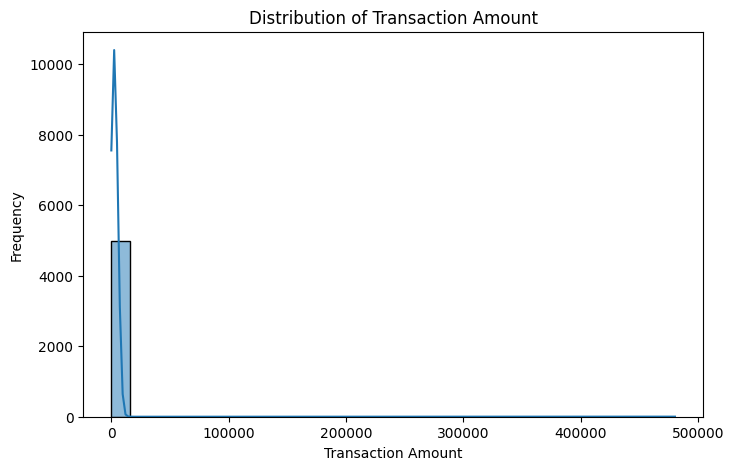

In [48]:
# Plot distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(transaction_data['Transaction Amount'], kde=True, bins=30)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Calculate IQR for Transaction Amount
q1 = transaction_data['Transaction Amount'].quantile(0.25)
q3 = transaction_data['Transaction Amount'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = max(0, q1 - 1.5 * iqr)  # Ensure lower_bound is not negative
upper_bound = q3 + 1.5 * iqr

# Cap transaction amounts
transaction_data['Transaction Amount'] = transaction_data['Transaction Amount'].clip(lower=lower_bound, upper=upper_bound)
print(f"Transaction Amount capped between {lower_bound} and {upper_bound}.")

Transaction Amount capped between 0 and 7315.0.


In [50]:
# Validation
print("Summary Statistics for Adjusted Transaction Amount:")
print(transaction_data['Transaction Amount'].describe())

Summary Statistics for Adjusted Transaction Amount:
count    5000.000000
mean     2496.432400
std      1439.232291
min        10.000000
25%      1260.000000
50%      2485.000000
75%      3682.000000
max      7315.000000
Name: Transaction Amount, dtype: float64


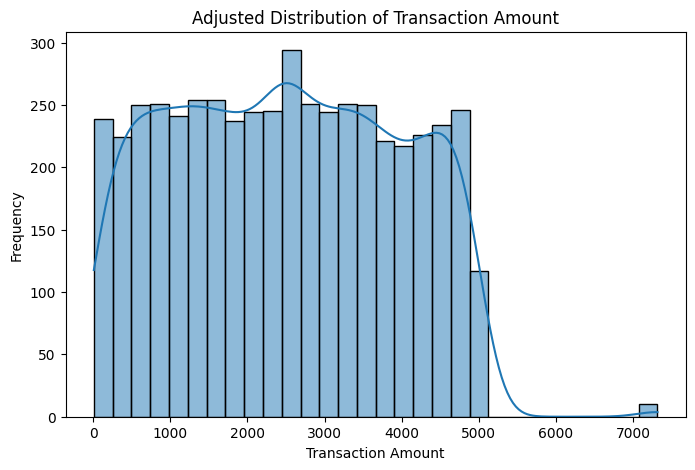

In [52]:
# Plot updated distribution
plt.figure(figsize=(8, 5))
sns.histplot(transaction_data['Transaction Amount'], kde=True, bins=30)
plt.title("Adjusted Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Transaction Type Counts:
Transaction Type
Loan Payment    1279
Investment      1243
Bill Payment    1241
Purchase        1237
Name: count, dtype: int64 



<ipython-input-53-2a93c908e51e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction Type', data=transaction_data, palette='viridis')


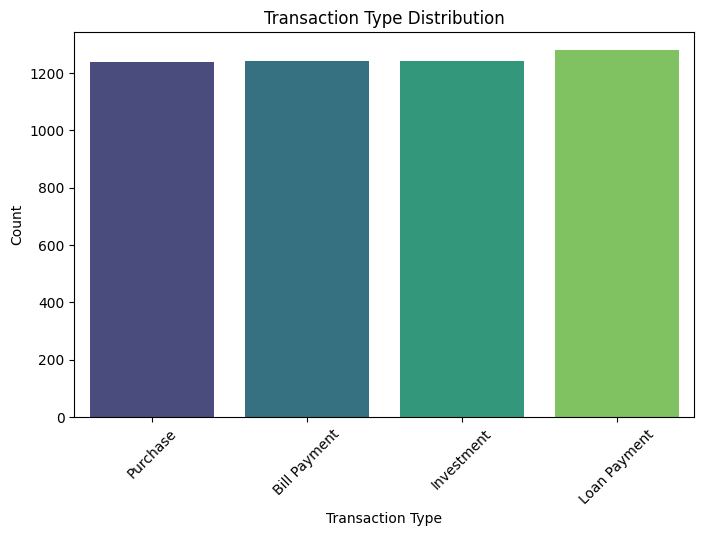

In [53]:
# Count of each transaction type
print("Transaction Type Counts:")
print(transaction_data['Transaction Type'].value_counts(), "\n")

# Visualize transaction type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Transaction Type', data=transaction_data, palette='viridis')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [54]:
# Feature Engineering for Transaction Dataset

# Aggregate customer-level features
transaction_features = transaction_data.groupby('Customer ID').agg(
    total_transaction_amount=('Transaction Amount', 'sum'),
    avg_transaction_amount=('Transaction Amount', 'mean'),
    transaction_count=('Transaction Amount', 'count'),
    loan_payment_count=('Transaction Type', lambda x: (x == 'Loan Payment').sum()),
    purchase_count=('Transaction Type', lambda x: (x == 'Purchase').sum()),
    investment_count=('Transaction Type', lambda x: (x == 'Investment').sum()),
    bill_payment_count=('Transaction Type', lambda x: (x == 'Bill Payment').sum())
).reset_index()

# Extract temporal features
transaction_data['Transaction Month'] = transaction_data['Transaction Date'].dt.month
transaction_data['Transaction Day'] = transaction_data['Transaction Date'].dt.day
transaction_data['Transaction Hour'] = transaction_data['Transaction Date'].dt.hour

# Add customer-level temporal features
temporal_features = transaction_data.groupby('Customer ID').agg(
    avg_transaction_hour=('Transaction Hour', 'mean'),
    transaction_month_mode=('Transaction Month', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

# Merge aggregated features
transaction_features = transaction_features.merge(temporal_features, on='Customer ID', how='left')

# Final output
print(transaction_features.head())

   Customer ID  total_transaction_amount  avg_transaction_amount  \
0            1                   16836.0                  2806.0   
1            2                    4907.0                  2453.5   
2            3                    1538.0                  1538.0   
3            4                    8295.0                  4147.5   
4            5                   14798.0                  2959.6   

   transaction_count  loan_payment_count  purchase_count  investment_count  \
0                  6                   1               1                 1   
1                  2                   1               0                 0   
2                  1                   0               0                 0   
3                  2                   1               1                 0   
4                  5                   0               2                 1   

   bill_payment_count  avg_transaction_hour  transaction_month_mode  
0                   3              6.833333         

In [55]:
# Feature Engineering for Customer Feedback Dataset

# Aggregate satisfaction score
feedback_features = customer_feedback_data.groupby('Customer ID').agg(
    avg_satisfaction_score=('Satisfaction Score', 'mean'),
    feedback_count=('Feedback Comments', 'count'),
    likelihood_to_recommend_avg=('Likelihood To Recommend', 'mean')
).reset_index()

# Combine unique feedback comments for each customer
feedback_features['aggregated_comments'] = customer_feedback_data.groupby('Customer ID')['Feedback Comments'].apply(
    lambda x: ', '.join(set(x))
).reset_index(drop=True)

# Add sentiment analysis (if available)
# Example sentiment scoring: Positive=1, Neutral=0, Negative=-1 (adjust based on context)
def sentiment_analysis(comment):
    positive_keywords = ['good', 'excellent', 'satisfied']
    negative_keywords = ['poor', 'unsatisfactory', 'bad', 'needs improvement']
    if any(word in comment.lower() for word in positive_keywords):
        return 1
    elif any(word in comment.lower() for word in negative_keywords):
        return -1
    else:
        return 0

customer_feedback_data['sentiment_score'] = customer_feedback_data['Feedback Comments'].apply(sentiment_analysis)

# Aggregate sentiment scores
sentiment_features = customer_feedback_data.groupby('Customer ID').agg(
    avg_sentiment_score=('sentiment_score', 'mean')
).reset_index()

# Merge feedback features
feedback_features = feedback_features.merge(sentiment_features, on='Customer ID', how='left')

# Final output
print(feedback_features.head())

   Customer ID  avg_satisfaction_score  feedback_count  \
0            1                8.500000               2   
1            2                4.333333               3   
2            3                8.333333               3   
3            4                5.500000               6   
4            5                6.444444               9   

   likelihood_to_recommend_avg  \
0                     9.000000   
1                     5.000000   
2                     3.666667   
3                     3.333333   
4                     5.666667   

                                 aggregated_comments  avg_sentiment_score  
0                       Very satisfied, Good service             1.000000  
1                     Very satisfied, Unsatisfactory             0.333333  
2          Very satisfied, Unsatisfactory, Excellent             0.333333  
3       Unsatisfactory, Excellent, Needs improvement            -0.666667  
4  Good service, Very satisfied, Excellent, Unsat...             0

In [56]:
# Feature Engineering for Product Offering
# Aggregate risk levels by product type
risk_features = product_offering_data.groupby('Product Type').agg(
    high_risk_count=('Risk Level', lambda x: (x == 'High').sum()),
    medium_risk_count=('Risk Level', lambda x: (x == 'Medium').sum()),
    low_risk_count=('Risk Level', lambda x: (x == 'Low').sum())
).reset_index()

# Display the risk features
print(risk_features.head())

      Product Type  high_risk_count  medium_risk_count  low_risk_count
0      Credit Card                0                  4               0
1       Investment                3                  0               0
2             Loan                0                  5               0
3  Savings Account                0                  0               3


In [57]:
# Additional aggregations
product_summary = product_offering_data.groupby('Product Type').agg(
    total_products=('Product ID', 'count'),  # Total count of products
    unique_risk_levels=('Risk Level', 'nunique')  # Number of unique risk levels
).reset_index()

# Display the product summary
print(product_summary.head())

      Product Type  total_products  unique_risk_levels
0      Credit Card               4                   1
1       Investment               3                   1
2             Loan               5                   1
3  Savings Account               3                   1


In [58]:
# Merge Customer Feedback with Transaction Data
merged_data = pd.merge(
    transaction_data,  # Transaction dataset
    customer_feedback_data,  # Customer Feedback dataset
    on='Customer ID',  # Common column to merge
    how='inner'  # Use 'inner' to keep only matching Customer IDs
)

# Verify the merged dataset after the first merge
print("Merged Data after merging Transactions with Customer Feedback:")
print(merged_data.head())
print(merged_data.info())

Merged Data after merging Transactions with Customer Feedback:
   Transaction ID  Customer ID    Transaction Date  Transaction Amount  \
0               1          393 2023-01-01 00:00:00              3472.0   
1               2          826 2023-01-01 01:00:00              2485.0   
2               2          826 2023-01-01 01:00:00              2485.0   
3               2          826 2023-01-01 01:00:00              2485.0   
4               2          826 2023-01-01 01:00:00              2485.0   

  Transaction Type  Transaction Amount Missing  Transaction Month  \
0         Purchase                       False                  1   
1     Bill Payment                        True                  1   
2     Bill Payment                        True                  1   
3     Bill Payment                        True                  1   
4     Bill Payment                        True                  1   

   Transaction Day  Transaction Hour  Satisfaction Score  Feedback Comments  

In [59]:
# Update column names to follow correct capitalization
merged_data.columns = [
    "Transaction ID", "Customer ID", "Transaction Date", "Transaction Amount",
    "Transaction Type", "Transaction Amount Missing", "Transaction Month",
    "Transaction Day", "Transaction Hour", "Satisfaction Score",
    "Feedback Comments", "Likelihood to Recommend", "Sentiment Score"
]

# Verify the updated column names
print("Updated Column Names:")
print(merged_data.columns)


Updated Column Names:
Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Transaction Type', 'Transaction Amount Missing',
       'Transaction Month', 'Transaction Day', 'Transaction Hour',
       'Satisfaction Score', 'Feedback Comments', 'Likelihood to Recommend',
       'Sentiment Score'],
      dtype='object')


In [60]:
# Save the merged dataset to a CSV file
merged_data.to_csv("merged_data.csv", index=False)

print("Merged dataset has been saved as 'merged_data.csv'.")

Merged dataset has been saved as 'merged_data.csv'.
